In [1]:
from sklearn.datasets.samples_generator import make_blobs 
import matplotlib.pyplot as plt  
import numpy as np 
from pandas import DataFrame 
%matplotlib inline  

In [27]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=4, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

In [28]:
import seaborn as sns

In [29]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    
    One possible improvement could be to use all columns fot fitting
    and using the first 2 columns and median of all other columns
    for predicting.
    
    Adopted from:
    http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    reduced_data = X[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    
    return plt

In [30]:
import xgboost as xgb

/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<module 'matplotlib.pyplot' from '/home/rafa/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

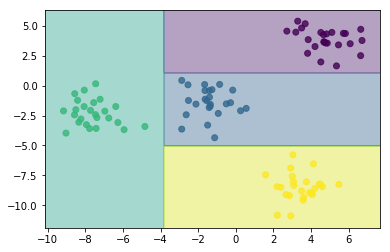

In [31]:
plot_decision_boundaries(X,y,xgb.XGBClassifier, gamma=1)

/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<module 'matplotlib.pyplot' from '/home/rafa/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

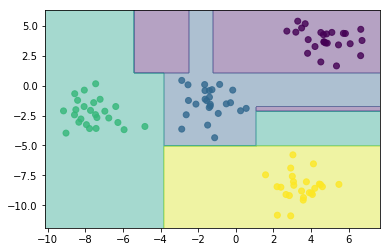

In [32]:
plot_decision_boundaries(X,y,xgb.XGBClassifier, gamma=0)

/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<module 'matplotlib.pyplot' from '/home/rafa/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

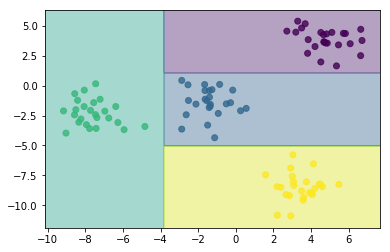

In [33]:
plot_decision_boundaries(X,y,xgb.XGBClassifier, gamma=0.3)

In [34]:
def custom_loss(preds, dtrain): 
    grad = 1
    hess = 10
    return grad, hess

/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<module 'matplotlib.pyplot' from '/home/rafa/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

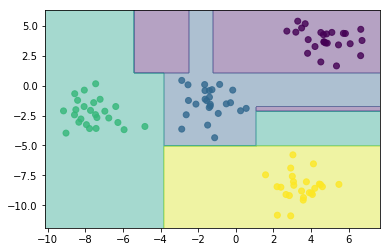

In [35]:
plot_decision_boundaries(X,y,xgb.XGBClassifier, obj=custom_loss)